### 목표
- 폐암 환자의 생존을 예측하는 분류 모델 만들기
- 다층 퍼셉트론(신경망)을 활용하여 이진 분류하기

#### 데이터 불러오기

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL/data/ThoraricSurgery.csv', header=None)

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [3]:
data.shape

(470, 18)

In [4]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329, 17), (141, 17), (329,), (141,))

#### 딥러닝 신경망 구축

##### 모델 정의
- 이진 분류이므로 출력층의 활성화 함수는 'sigmoid' 적용

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##### 모델 컴파일
- 이진 분류이므로 손실 함수는 'binary_crossentropy' 적용

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

- 모델 정보 확인
    - 파라미터의 갯수는 뉴런들의 w(가중치)와 b(절편)의 갯수이다.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습

In [9]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 5s 3ms/step - loss: 3.8606 - accuracy: 0.8541
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.7264
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.8450
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7941 - accuracy: 0.6900
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.8450
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8511
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.8389
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8480
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8541
Epoch 11/

#### 시각화

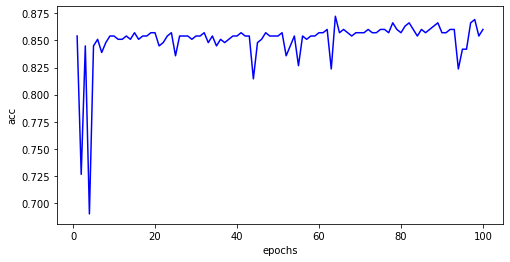

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), history.history['accuracy'], color='blue')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

#### 모델 평가
- 0.54의 오차와 0.84의 정확도를 확인할 수 있다

In [11]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.8369


[0.5052760243415833, 0.8368794322013855]

#### 모델 예측

In [12]:
# 모델이 X_test를 예측한 결과값
pred = model.predict(X_test)
pred = pred > 0.5   # 결과값들을 True, Flase(0, 1)로 구분해주기

# accuracy_score()로 점수 확인
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(pred, y_test)

0.8368794326241135

In [13]:
# 분류 성능 평가 지표
print(classification_report(pred[:, 0], y_test))

              precision    recall  f1-score   support

       False       0.99      0.84      0.91       140
        True       0.00      0.00      0.00         1

    accuracy                           0.84       141
   macro avg       0.50      0.42      0.46       141
weighted avg       0.98      0.84      0.90       141

